In [11]:
# подключение библиотек для выполнения задания
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import random

# установка вывода графиков в окне jupiter
%matplotlib inline

In [12]:
from deap import base
from deap import creator
from deap import tools

In [13]:
# определение функции
import numpy as np
def FSteng(x, y):
    return np.power((x - y), 2.) + np.power(((x + y - 10)/3), 2.);

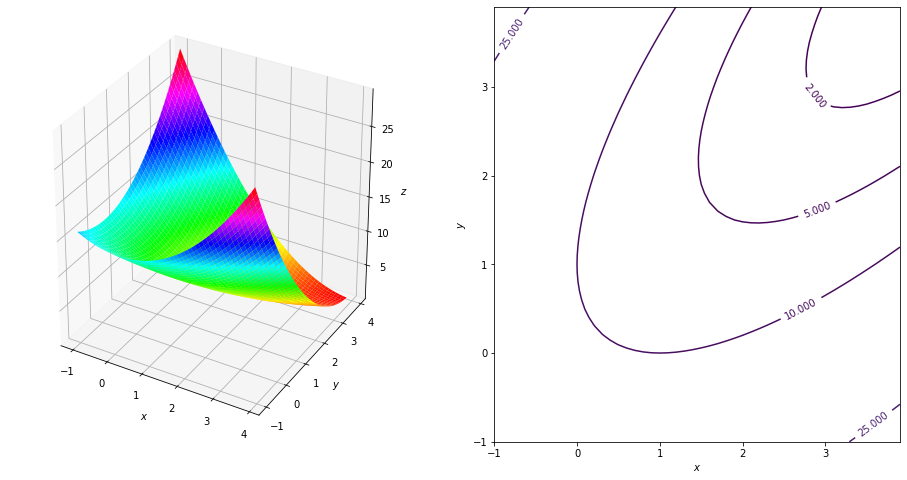

In [14]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# определение данных
X = np.arange(-1, 4, .1)
Y = np.arange(-1, 4, .1)
X, Y = np.meshgrid(X, Y)

Z = FSteng(X,Y)

# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# вывод функции (1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# построение поверхности
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hsv, 
                       linewidth=0, antialiased=True)

# вывод функции (2)
ax = fig.add_subplot(1, 2, 2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300])

# добавление подписей к линиям уровня
ax.clabel(cs)

plt.show()

In [15]:
# определение функции
def FSteng(individual):
    x = individual[0];
    y = individual[1];
    
    return np.power((x - y), 2.) + np.power(((x + y - 10)/3), 2.),

In [16]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import cma
from deap import creator
from deap import tools

# Problem size
N=2;

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("evaluate", FSteng)

def main():
    # The cma module uses the numpy random number generator
    np.random.seed(128)

    # The CMA-ES algorithm takes a population of one individual as argument
    # The centroid is set to a vector of 5.0
    strategy = cma.Strategy(centroid=[5.0]*N, sigma=5.0, lambda_=20*N)
    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    #logger = tools.EvolutionLogger(stats.functions.keys())
   
    # The CMA-ES algorithm converge with good probability with those settings
    pop, logbook = algorithms.eaGenerateUpdate(toolbox, ngen=55, stats=stats, halloffame=hof, verbose = False)
    
    return pop, logbook, hof

C:\anakonda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\anakonda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [17]:
pop, stats, hof = main();


In [18]:
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

Best individual is [5.000000000000009, 5.000000000000003], (5.127595883936577e-29,)


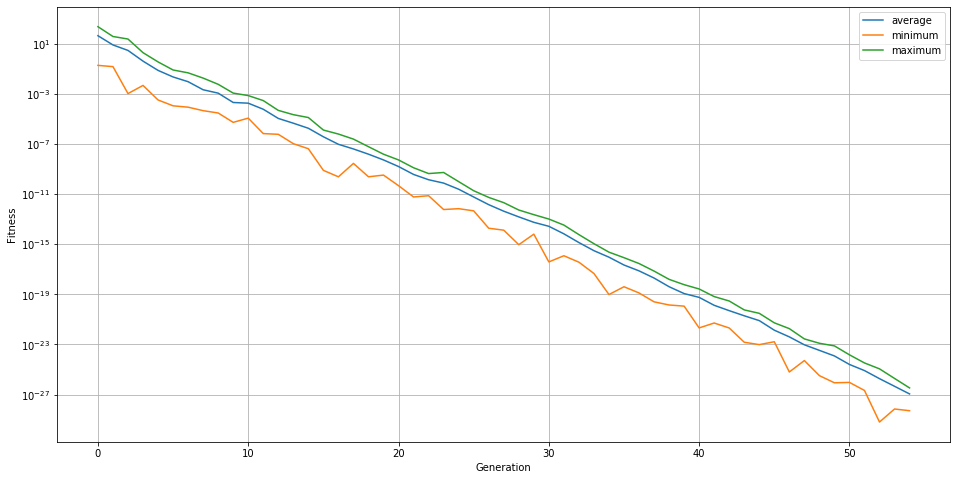

In [19]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

gen, avg, min_, max_ = stats.select("gen", "avg", "min", "max")
plt.semilogy(gen, avg, label="average")
plt.semilogy(gen, min_, label="minimum")
plt.semilogy(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.legend(loc="upper right")
plt.grid()
plt.show()